## Movie Review Sentiment Classification with an SVC model

In [1]:
import data_preprocessor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
DATA_PATH = "./data/review_polarity"

### Exploratory Data Analysis

First, clean the data from the dataset using the `data_preprocessor` module.
This ensures consistency and prepares the raw text for model training.

In [2]:
data = data_preprocessor.load_and_clean_reviews(DATA_PATH)
df = pd.DataFrame(data)

print(df.shape)

# Split DataFrame
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

(2000, 2)


Then show some information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2000 non-null   object
 1   sentiment  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
df.describe()

,sentiment
count,2000.000000
mean,0.500000
std,0.500125
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [5]:
df.head()

,review,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,jaws is a rare film that grabs your attention ...,1
4,moviemaking is a lot like being the general ma...,1


In [6]:
df.tail()

,review,sentiment
1995,"if anything , stigmata should be taken as a wa...",0
1996,john boorman's zardoz is a goofy cinematic deb...,0
1997,the kids in the hall are an acquired taste . i...,0
1998,there was a time when john carpenter was a gre...,0
1999,two party guys bob their heads to haddaway's d...,0


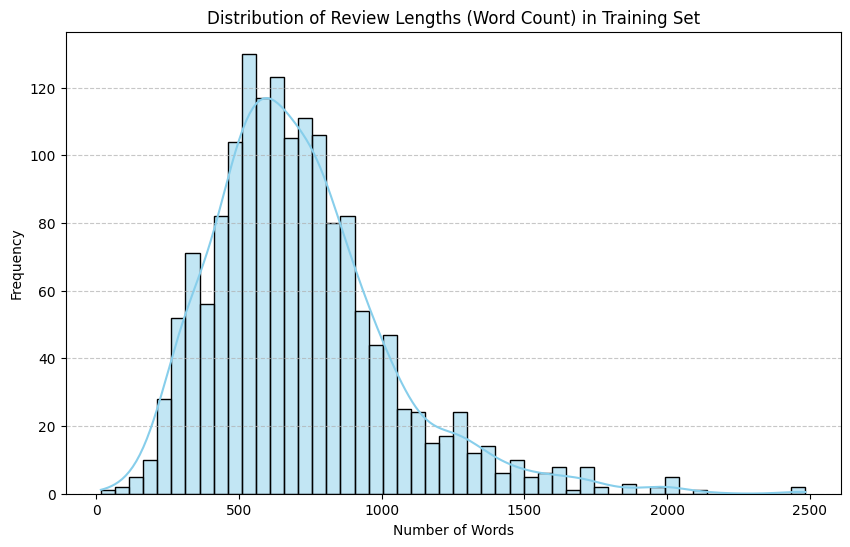

In [7]:
train_df['length'] = train_df['review'].apply(lambda x: len(x.split()))

# Distribution of review length in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='length', bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths (Word Count) in Training Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()

### Model Training

Now, get a numerical representation of the data to feed to the SVC model.

In [8]:
# Create the separate "dataframes"
X_train = train_df['review'].tolist()
y_train = train_df['sentiment'].tolist()
X_test = test_df['review'].tolist()
y_test = test_df['sentiment'].tolist()

# Prepare the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=10000,  # Increased from 5000
    ngram_range=(1, 2),  # Include bigrams
    min_df=2,            # Ignore terms appearing in < 2 documents
    max_df=0.8,          # Ignore terms appearing in > 80% of documents
    sublinear_tf=True    # Apply sublinear tf scaling
)

# Apply the vectorization to both the train and test reviews
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Once the data is vectorized, move on to training an SVC model with this data.

In [9]:
model = SVC(kernel='linear', random_state=RANDOM_SEED)
model.fit(X_train_vectorized, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
y_pred = model.predict(X_test_vectorized)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8825
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       201
           1       0.88      0.89      0.88       199

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

